<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


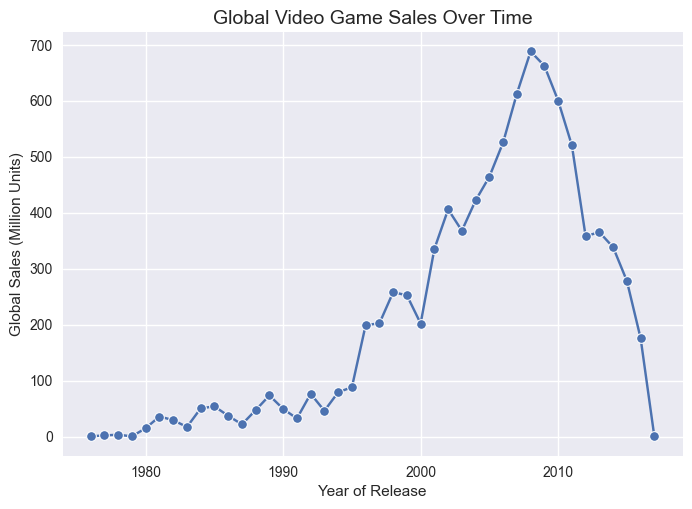

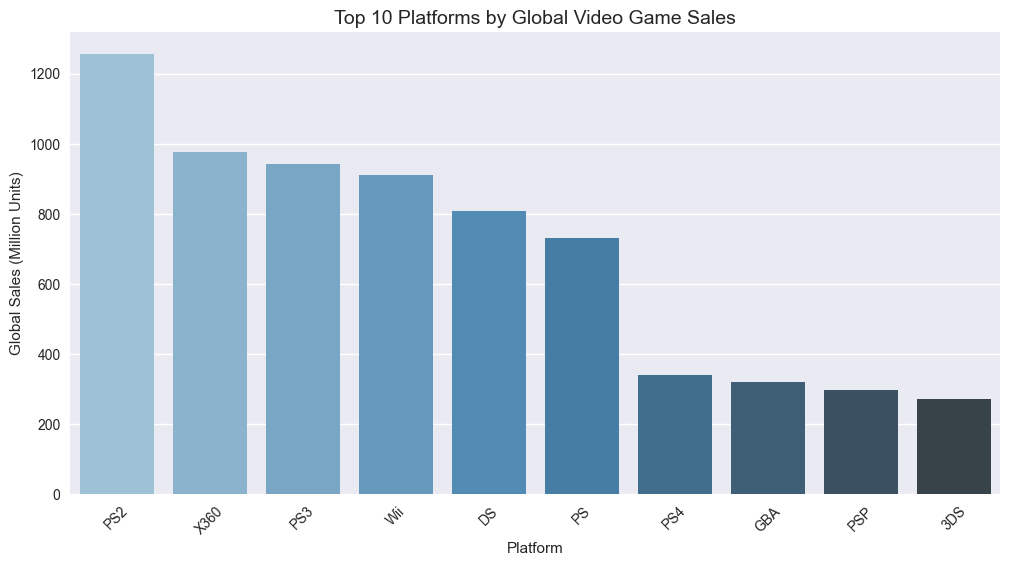

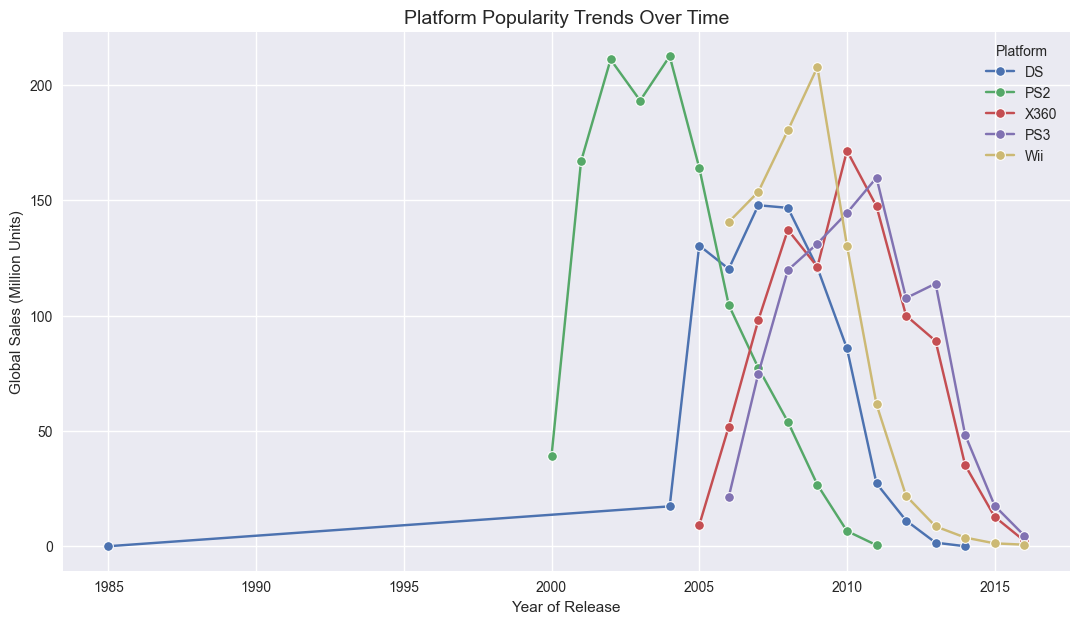

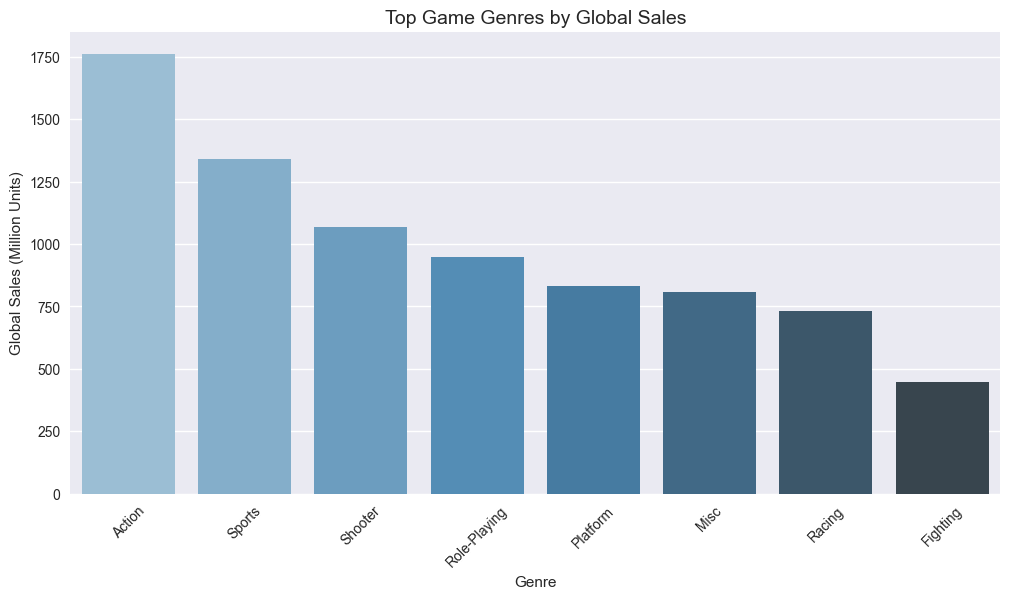

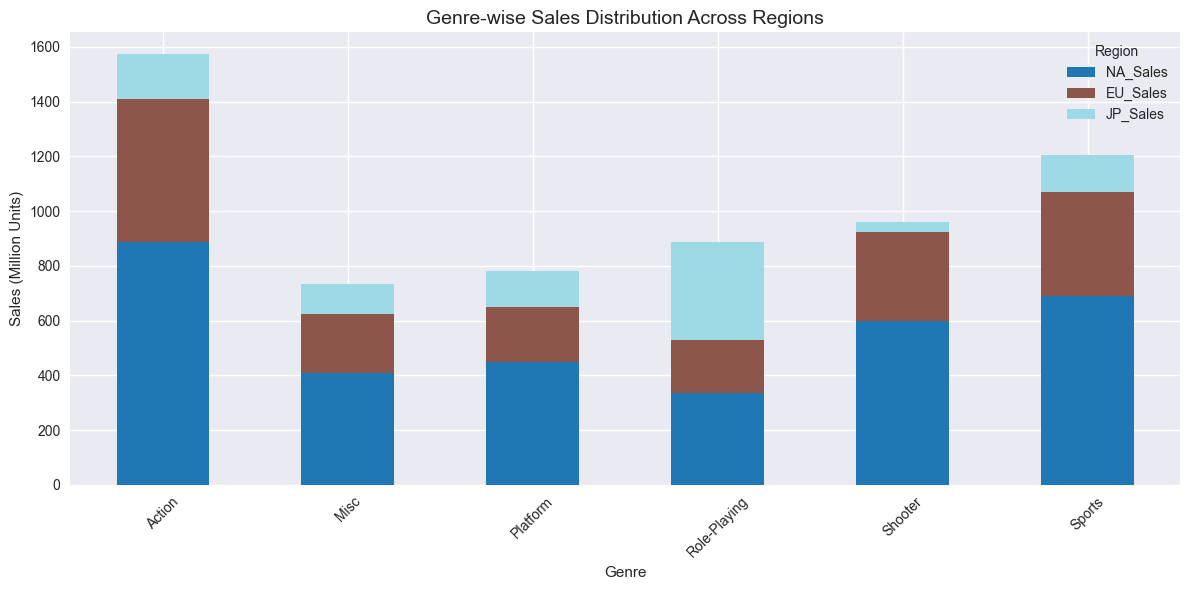

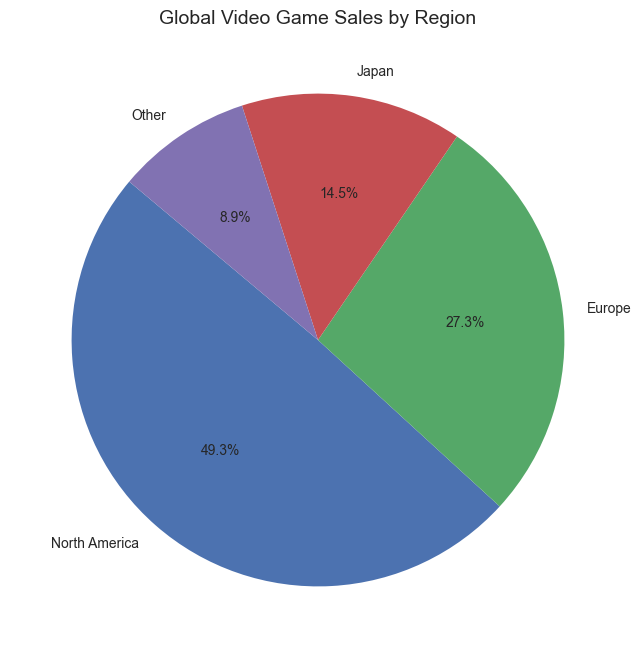

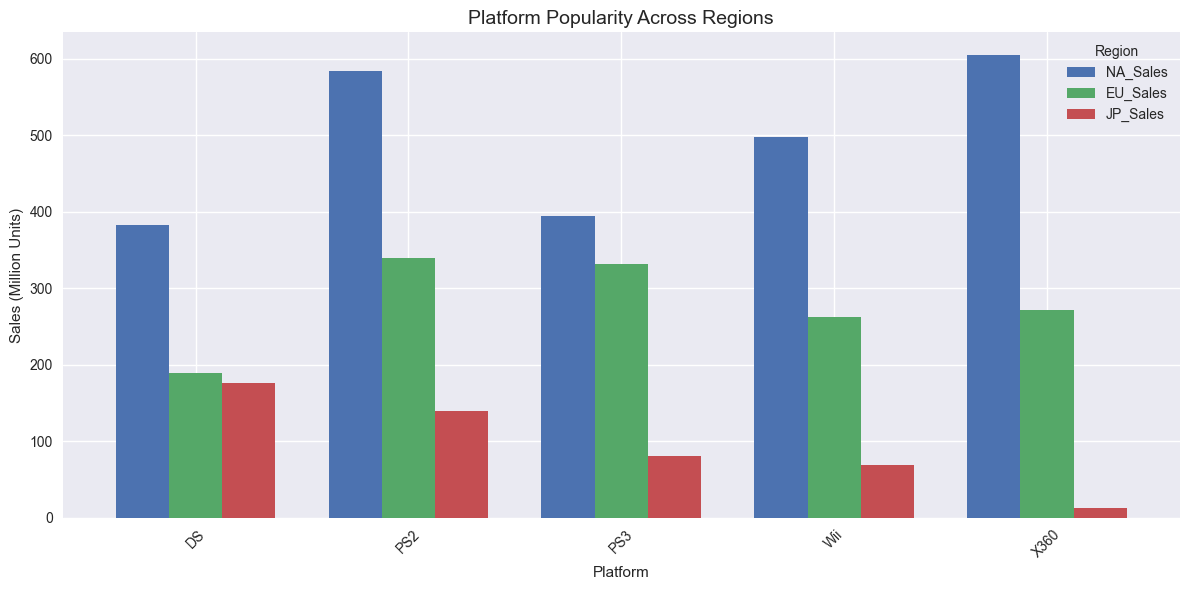

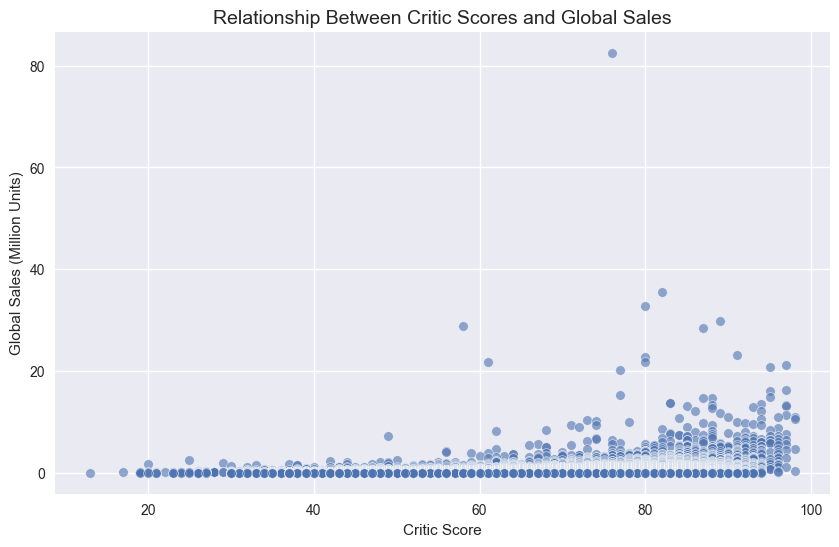

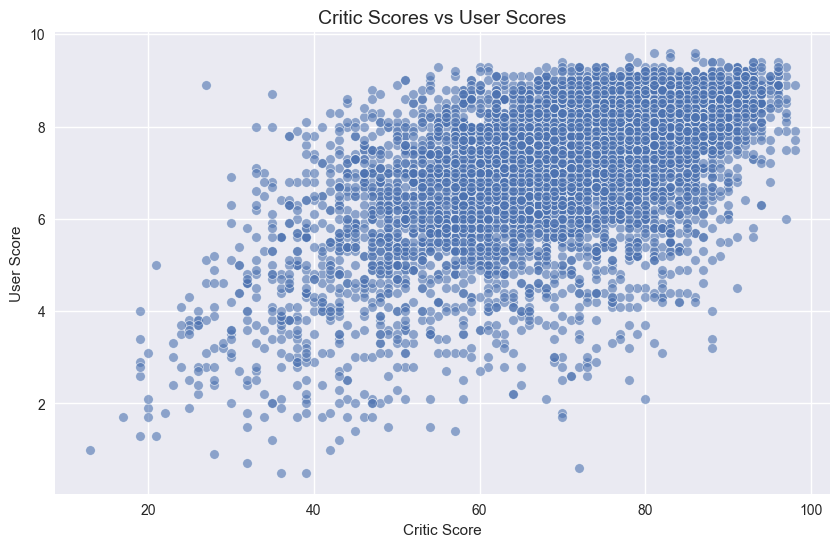

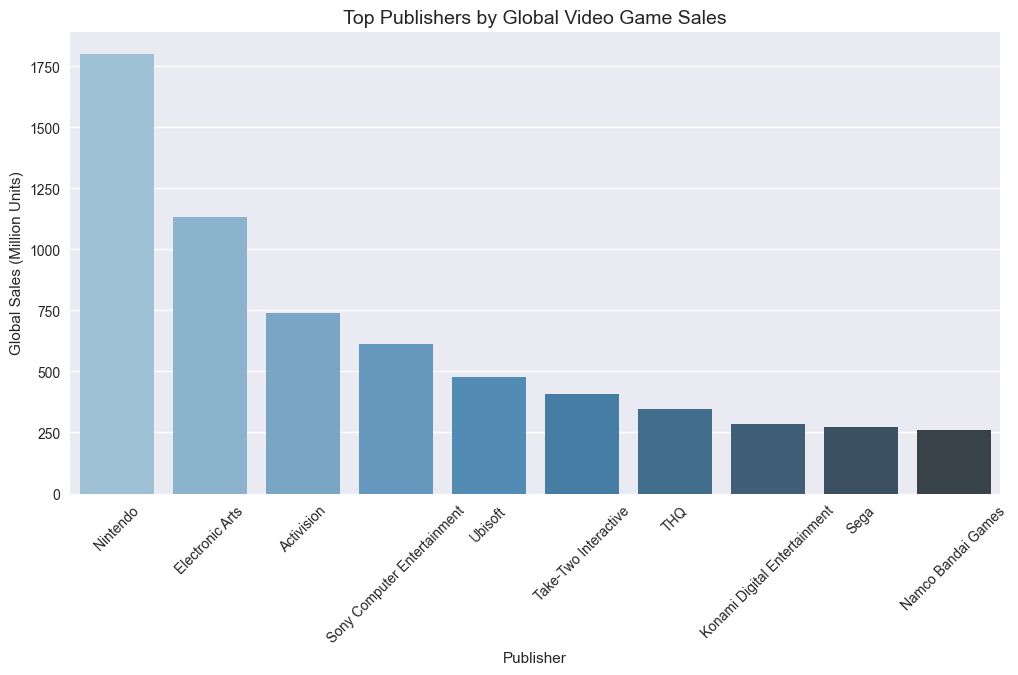

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# reading the sales data and storing it into a data frame
df = pd.read_csv('../data/Video_Game_Sales_as_of_Jan_2017.csv')

# basic inspection
df.info()
df.describe()


'''
Question 1 How have global video game sales evolved over time?
'''

# dropping rows with no year value 
df_year = df.dropna(subset=['Year_of_Release']).copy()

# explicitly converting year to int 
df_year['Year_of_Release'] = df_year['Year_of_Release'].astype(int)

# aggregating sales by year 
sales_by_year = (df_year
    .groupby("Year_of_Release")["Global_Sales"]
    .sum()
    .reset_index()
)

# a line graph showing trends through years 
plt.Figure(figsize=(12,6))
sns.lineplot(
    data=sales_by_year,
    x="Year_of_Release",
    y="Global_Sales",
    marker="o"
)

plt.title("Global Video Game Sales Over Time", fontsize=14)
plt.xlabel("Year of Release")
plt.ylabel("Global Sales (Million Units)")
plt.grid(True)
plt.show()


'''
    Question 2 Which platforms generate the highest total global sales?
'''

sales_by_platform =  (
    df.groupby("Platform")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# considering the top 10 platforms for clear visualisations 
top_platforms = sales_by_platform.head(10)

# a bar graph showing sales by platform 
plt.figure(figsize=(12, 6))

sns.barplot(
    data=top_platforms,
    x="Platform",
    y="Global_Sales",
    palette="Blues_d",
    hue="Platform",
    legend=False
)

plt.title("Top 10 Platforms by Global Video Game Sales", fontsize=14)
plt.xlabel("Platform")
plt.ylabel("Global Sales (Million Units)")
plt.xticks(rotation=45)
plt.show()

'''
    Question 3  How has platform popularity changed over time?
'''

# using the previously created df_year to find the top 5 platforms to analyse their trend over years 
top_platforms = (
    df_year.groupby("Platform")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# filtering dataset of only top platforms 
df_top_platforms = df_year[df_year["Platform"].isin(top_platforms)]

# using aggregation to get platform yearly sales 
platform_yearly_sales = (
    df_top_platforms
    .groupby(["Year_of_Release", "Platform"])["Global_Sales"]
    .sum()
    .reset_index()
)



# plotting line graph to visualise the trends
plt.figure(figsize=(13, 7))

sns.lineplot(
    data=platform_yearly_sales,
    x="Year_of_Release",
    y="Global_Sales",
    hue="Platform",
    marker="o"
)

plt.title("Platform Popularity Trends Over Time", fontsize=14)
plt.xlabel("Year of Release")
plt.ylabel("Global Sales (Million Units)")
plt.legend(title="Platform")
plt.grid(True)
plt.show()


'''
    Question 4 Which game genres generate the highest global sales?
'''

# aggregating based on genre 
sales_by_genre = (
    df.groupby("Genre")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# considering the top 7 genres for better visibility in visualization 
top_genres = sales_by_genre.head(8)

# plotting bar chart to visualise the sales by genre 
plt.figure(figsize=(12, 6))

sns.barplot(
    data=top_genres,
    x="Genre",
    y="Global_Sales",
    palette="Blues_d",
    hue="Genre",
    legend=False
)

plt.title("Top Game Genres by Global Sales", fontsize=14)
plt.xlabel("Genre")
plt.ylabel("Global Sales (Million Units)")
plt.xticks(rotation=45)
plt.show()

'''
    Question 5 How do different game genres perform across regions (North America, Europe, and Japan)?
'''

# to have a clear visualisation, the top 6 genres were considered to analyse their performance across regions 
top_genres_list = (
    df.groupby("Genre")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(6)
    .index
)

#filtering only the top genre rows from the dataset 
df_top_genres = df[df["Genre"].isin(top_genres_list)]

# aggregating regional sales by genre
genre_region_sales = (
    df_top_genres
    .groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales"]]
    .sum()
    .reset_index()
)


# plotting a stacked bar chart to understand how each genre is performing across different regions 
genre_region_sales.set_index("Genre", inplace=True)

genre_region_sales.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="tab20"
)

plt.title("Genre-wise Sales Distribution Across Regions", fontsize=14)
plt.xlabel("Genre")
plt.ylabel("Sales (Million Units)")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

'''
    Question 6 How do regional sales contributions differ globally?
'''

# To explain how each region contributes to global sales, regions sales aggregration is performed
regional_sales = pd.DataFrame({
    "Region": ["North America", "Europe", "Japan", "Other"],
    "Sales": [
        df["NA_Sales"].sum(),
        df["EU_Sales"].sum(),
        df["JP_Sales"].sum(),
        df["Other_Sales"].sum()
    ]
})

# A pie chart is plotted showing region wise sales contribution 
plt.figure(figsize=(8, 8))

plt.pie(
    regional_sales["Sales"],
    labels=regional_sales["Region"],
    autopct="%1.1f%%",
    startangle=140
)

plt.title("Global Video Game Sales by Region", fontsize=14)
plt.show()

'''
    Question 7 Which platforms are most popular in each region?
'''

# To analyse what platforms are popular in each region and to have a clear visuals, the top 5 platforms are considered 
top_platforms_list = (
    df.groupby("Platform")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# filtering out only the rows that has one of the top 5 platforms in it
df_top_platforms = df[df["Platform"].isin(top_platforms_list)]

region_wise_platform_sales = platform_region_sales = (
    df_top_platforms
    .groupby("Platform")[["NA_Sales", "EU_Sales", "JP_Sales"]]
    .sum()
    .reset_index()
)

# plotting grouped bar chart  to understand how the top 5 platforms are performing across regions 
platform_region_sales.set_index("Platform", inplace=True)

platform_region_sales.plot(
    kind="bar",
    figsize=(12, 6),
    width=0.75
)

plt.title("Platform Popularity Across Regions", fontsize=14)
plt.xlabel("Platform")
plt.ylabel("Sales (Million Units)")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

'''
    Question 8 Is there a relationship between critic scores and global video game sales?
'''

# dropping out rows where critic score is null or na 
df_critic = df.dropna(subset=["Critic_Score"]).copy()

# ensuring critic score is numeric
df_critic["Critic_Score"] = df_critic["Critic_Score"].astype(float)
# df_critic[["Critic_Score", "Global_Sales"]].head()

# visualising the relationship between critic scores and the sales using scatter plot 
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_critic,
    x="Critic_Score",
    y="Global_Sales",
    alpha=0.6
)

plt.title("Relationship Between Critic Scores and Global Sales", fontsize=14)
plt.xlabel("Critic Score")
plt.ylabel("Global Sales (Million Units)")
plt.grid(True)
plt.show()

'''
    Question 9 Do critic scores and user scores align?
'''

# filtering rows that contains both critic and user scores 
df_scores = df.dropna(subset=["Critic_Score", "User_Score"]).copy()

# converting critic and user scores to numeric 
df_scores["Critic_Score"] = df_scores["Critic_Score"].astype(float)
df_scores["User_Score"] = pd.to_numeric(df_scores["User_Score"], errors="coerce")

df_scores = df_scores.dropna(subset=["User_Score"])

# visualising the relationship between critic and user score using scatter plot
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_scores,
    x="Critic_Score",
    y="User_Score",
    alpha=0.6
)

plt.title("Critic Scores vs User Scores", fontsize=14)
plt.xlabel("Critic Score")
plt.ylabel("User Score")
plt.grid(True)
plt.show()

'''
     Question 10 Is commercial success driven by a few highly successful publishers?
'''

# To understand the impact of succesful publishers on overall sales we need get publisher level global sales 
publisher_sales = (
    df.groupby("Publisher")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

top_publishers = publisher_sales.head(10)

# plotting a bar chart 

plt.figure(figsize=(12, 6))

sns.barplot(
    data=top_publishers,
    x="Publisher",
    y="Global_Sales",
    palette="Blues_d",
    legend=False,
    hue="Publisher"
)

plt.title("Top Publishers by Global Video Game Sales", fontsize=14)
plt.xlabel("Publisher")
plt.ylabel("Global Sales (Million Units)")
plt.xticks(rotation=45)
plt.show()